# Heart Failure Prediction

# Libraries Import

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [89]:
df=pd.read_csv("heart.csv")

In [90]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Data Transformation

In [92]:
# Replace 1 to Heart_disease and 0 to Normal in column HeartDisease.
df["HeartDisease"]=df["HeartDisease"].replace({1:'Heart_disese',0:'Normal'})

# Replace N to No and Y to Yes in column ExerciseAngina.
df["ExerciseAngina"]=df["ExerciseAngina"].replace({'N':'No','Y':'Yes'})

# Change column name FastingBS to Fasting_blood_sugar
df.rename(columns={'FastingBS': 'Fasting_blood_sugar(mg/dl)'}, inplace=True)

#Replace 1 to >120 and 0 to <120 in column FastingBS
df["Fasting_blood_sugar(mg/dl)"]=df["Fasting_blood_sugar(mg/dl)"].replace({1:'>120',0:'<120'})

# Data Exploration

In [94]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,Fasting_blood_sugar(mg/dl),RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,<120,Normal,172,No,0.0,Up,Normal
1,49,F,NAP,160,180,<120,Normal,156,No,1.0,Flat,Heart_disese
2,37,M,ATA,130,283,<120,ST,98,No,0.0,Up,Normal
3,48,F,ASY,138,214,<120,Normal,108,Yes,1.5,Flat,Heart_disese
4,54,M,NAP,150,195,<120,Normal,122,No,0.0,Up,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,<120,Normal,132,No,1.2,Flat,Heart_disese
914,68,M,ASY,144,193,>120,Normal,141,No,3.4,Flat,Heart_disese
915,57,M,ASY,130,131,<120,Normal,115,Yes,1.2,Flat,Heart_disese
916,57,F,ATA,130,236,<120,LVH,174,No,0.0,Flat,Heart_disese


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         918 non-null    int64  
 1   Sex                         918 non-null    object 
 2   ChestPainType               918 non-null    object 
 3   RestingBP                   918 non-null    int64  
 4   Cholesterol                 918 non-null    int64  
 5   Fasting_blood_sugar(mg/dl)  918 non-null    object 
 6   RestingECG                  918 non-null    object 
 7   MaxHR                       918 non-null    int64  
 8   ExerciseAngina              918 non-null    object 
 9   Oldpeak                     918 non-null    float64
 10  ST_Slope                    918 non-null    object 
 11  HeartDisease                918 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 86.2+ KB


In [96]:
df.dtypes

Age                             int64
Sex                            object
ChestPainType                  object
RestingBP                       int64
Cholesterol                     int64
Fasting_blood_sugar(mg/dl)     object
RestingECG                     object
MaxHR                           int64
ExerciseAngina                 object
Oldpeak                       float64
ST_Slope                       object
HeartDisease                   object
dtype: object

In [98]:
df.describe(include="object")

,Sex,ChestPainType,Fasting_blood_sugar(mg/dl),RestingECG,ExerciseAngina,ST_Slope,HeartDisease
count,918,918,918,918,918,918,918
unique,2,4,2,3,2,3,2
top,M,ASY,<120,Normal,No,Flat,Heart_disese
freq,725,496,704,552,547,460,508


In [99]:
df.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [100]:
df.nunique()

Age                            50
Sex                             2
ChestPainType                   4
RestingBP                      67
Cholesterol                   222
Fasting_blood_sugar(mg/dl)      2
RestingECG                      3
MaxHR                         119
ExerciseAngina                  2
Oldpeak                        53
ST_Slope                        3
HeartDisease                    2
dtype: int64

# Data Cleaning

In [101]:
df.isnull().sum()

Age                           0
Sex                           0
ChestPainType                 0
RestingBP                     0
Cholesterol                   0
Fasting_blood_sugar(mg/dl)    0
RestingECG                    0
MaxHR                         0
ExerciseAngina                0
Oldpeak                       0
ST_Slope                      0
HeartDisease                  0
dtype: int64

In [102]:
df.duplicated().sum()

0

# Data visualization
--------------------

# Target visualization

In [105]:
types=df["HeartDisease"].value_counts()
colors=['Lightcoral','lightgreen']

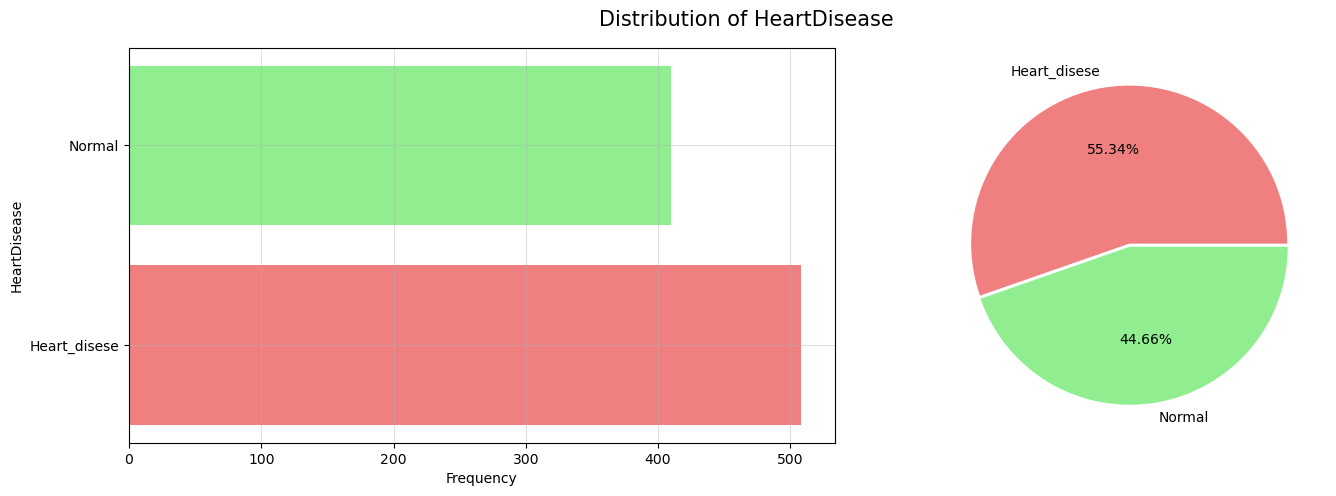

In [106]:
# Create two-subplot layout
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

# Bar chart on the first subplot
ax1.barh(y=types.index, width=types.values, color=colors)
ax1.set_xlabel('Frequency')
ax1.set_ylabel('HeartDisease')
ax1.grid(alpha=0.4)

# Pie chart on the second subplot
ax2.pie(types.values, labels=types.index, explode=([0.01] * len(types.index)), colors=colors, autopct='%.2f%%')

# Configure the overall layout
fig.suptitle('Distribution of HeartDisease', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

# Categorical Features Distribution

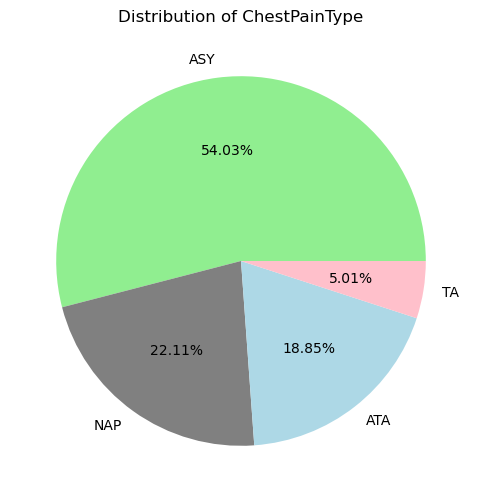

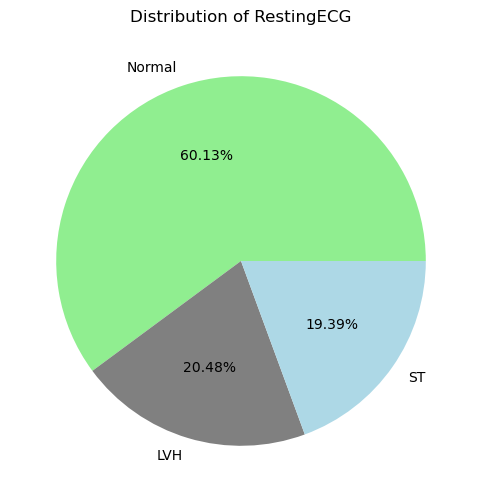

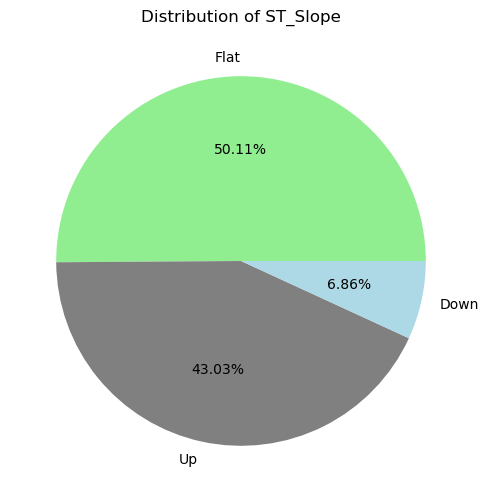

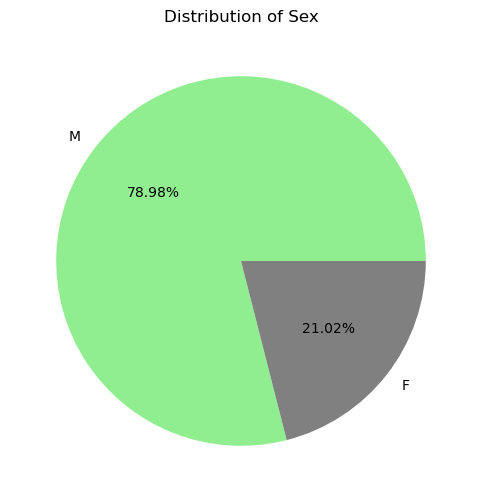

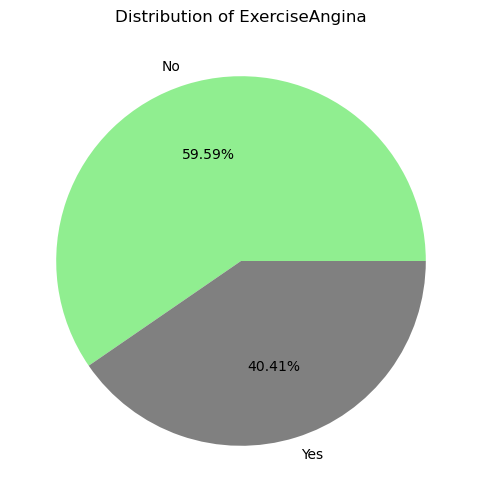

In [107]:
# describe colors
palette= ['lightgreen', 'gray', 'lightblue', 'pink', 'purple']

# Iterate through the specified columns and generate pie charts and then Get value counts and sort in descending order (corrected keyword argument)
for column in ['ChestPainType', 'RestingECG', 'ST_Slope', 'Sex', 'ExerciseAngina']:
    value_counts = df[column].value_counts().sort_values(ascending=False)
    
     # Get pie chart slice labels and values
    slice_labels = value_counts.index.to_numpy()
    slice_values = value_counts.to_numpy()

    # Create the pie chart with the specified palette
    plt.figure(figsize=(6, 6)) 
    plt.pie(slice_values, labels=slice_labels, autopct="%1.2f%%", colors=palette[:len(slice_labels)])
    plt.title(f"Distribution of {column}")
    plt.show()


# Distribution of HeartDisease By Age

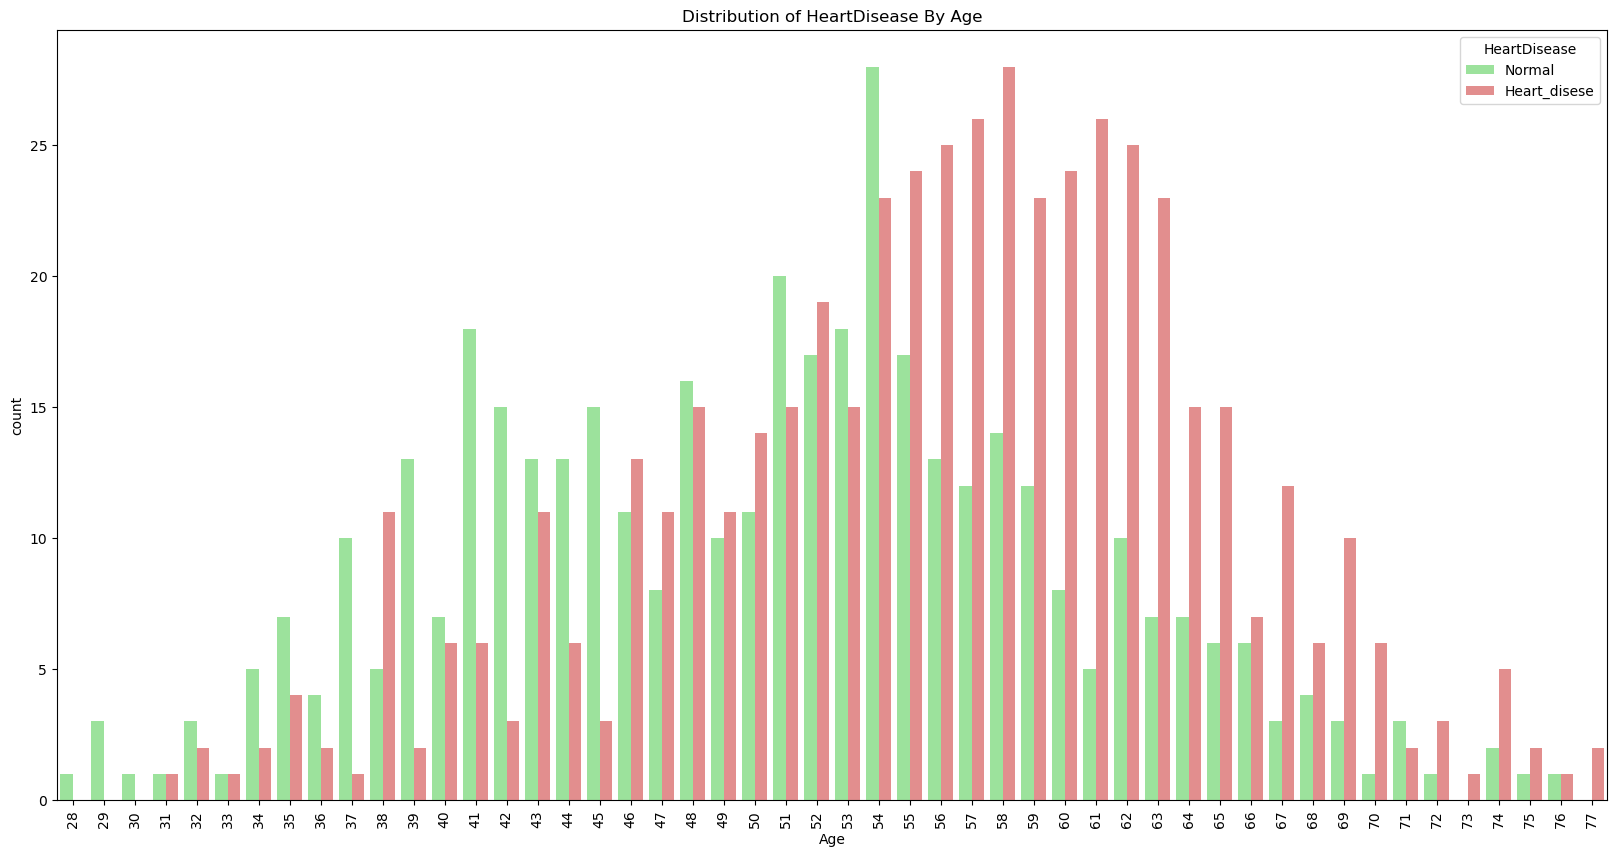

In [108]:
plt.figure(figsize=(20, 10))
sns.countplot(x = df['Age'] , hue=df['HeartDisease'], palette=['lightgreen', 'lightcoral'])  # Apply colors
plt.title('Distribution of HeartDisease By Age')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

# Distribution of Heart Disease by Gender

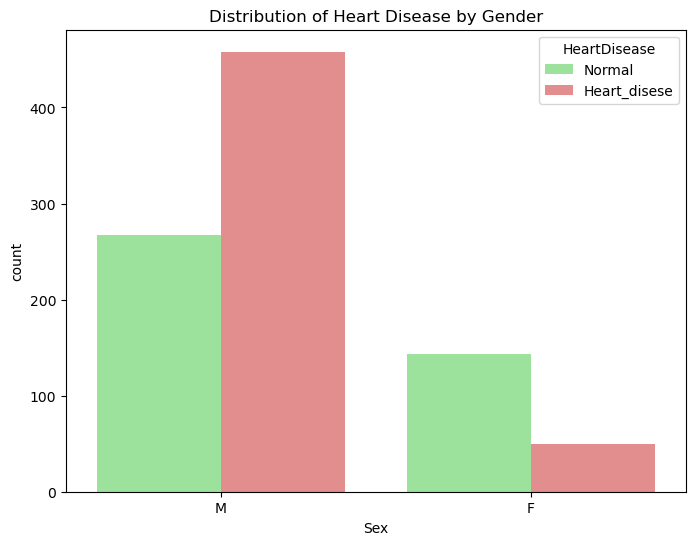

In [112]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Sex'],hue=df['HeartDisease'],palette=['lightgreen', 'lightcoral'])
plt.title("Distribution of Heart Disease by Gender")
plt.show()

# Distribution of Heart Disease by Chest pain

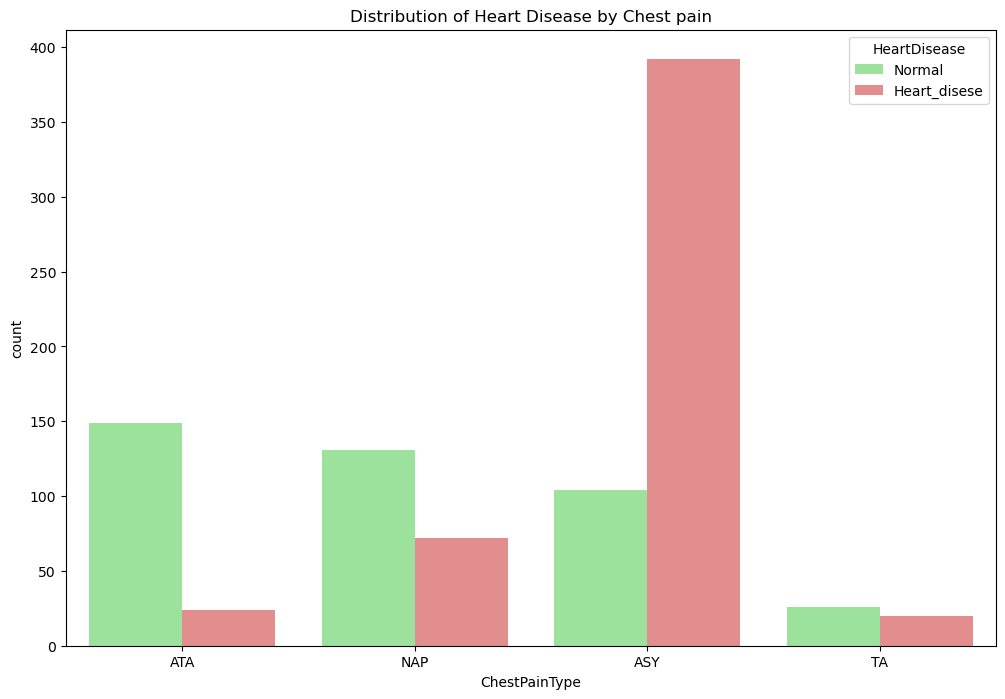

In [116]:
plt.figure(figsize=(12,8))
sns.countplot(x=df["ChestPainType"], hue=df["HeartDisease"], palette=['lightgreen', 'lightcoral'])
plt.title("Distribution of Heart Disease by Chest pain")
plt.show()

# Distribution of Heart Disease by RestingBP

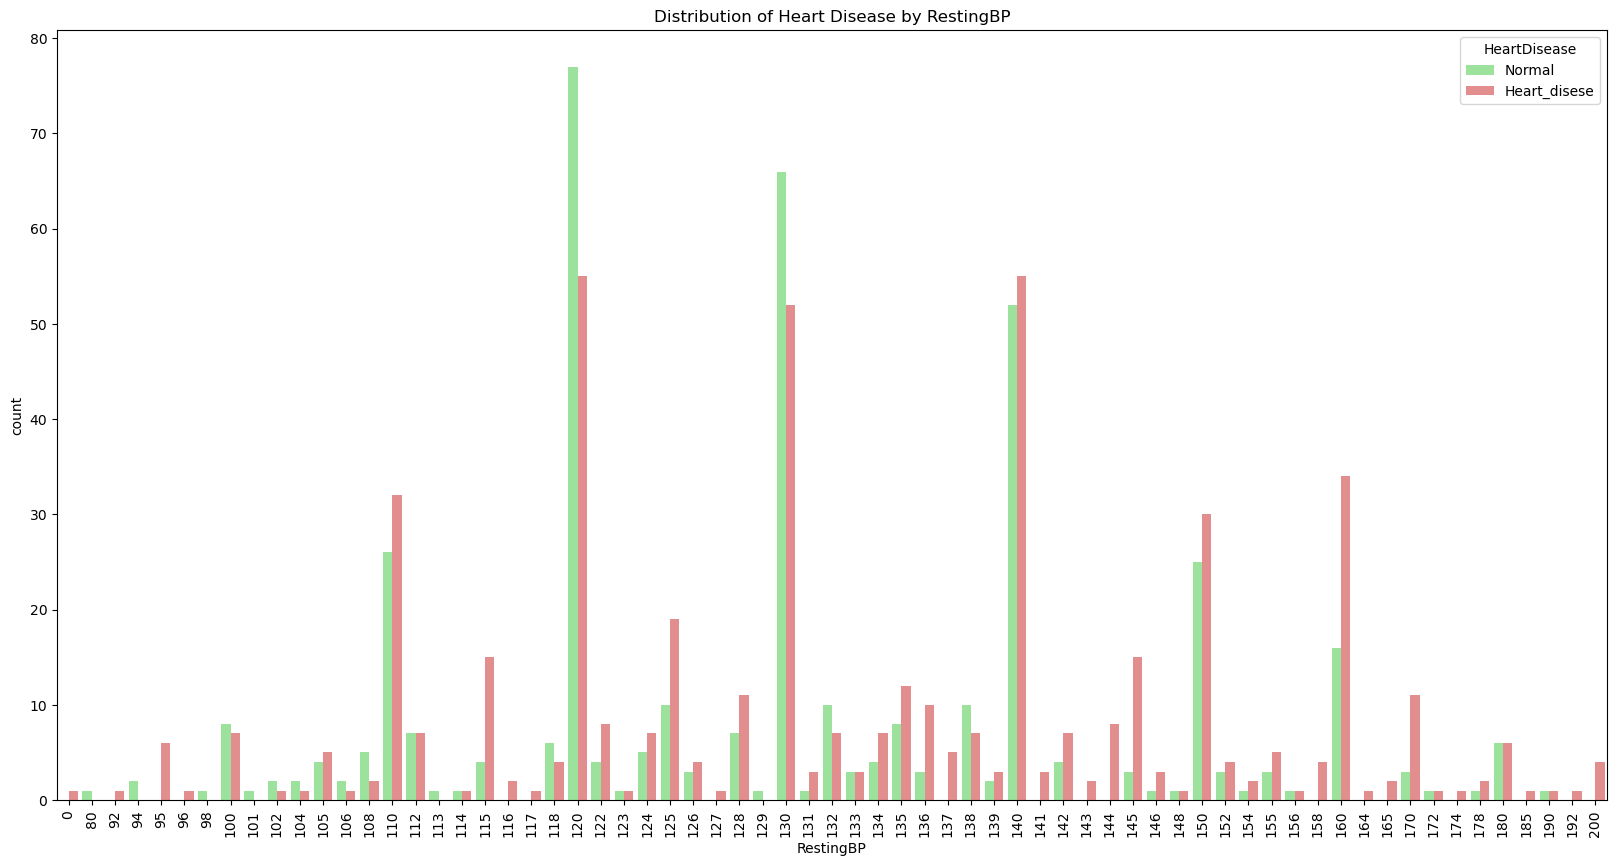

In [117]:
plt.figure(figsize=(20,10))
sns.countplot(x=df["RestingBP"],hue=df["HeartDisease"],palette=['lightgreen', 'lightcoral'])
plt.title("Distribution of Heart Disease by RestingBP")
plt.xticks(rotation=90)
plt.show()

# Distribution of Heart Disease by Fasting_blood_sugar

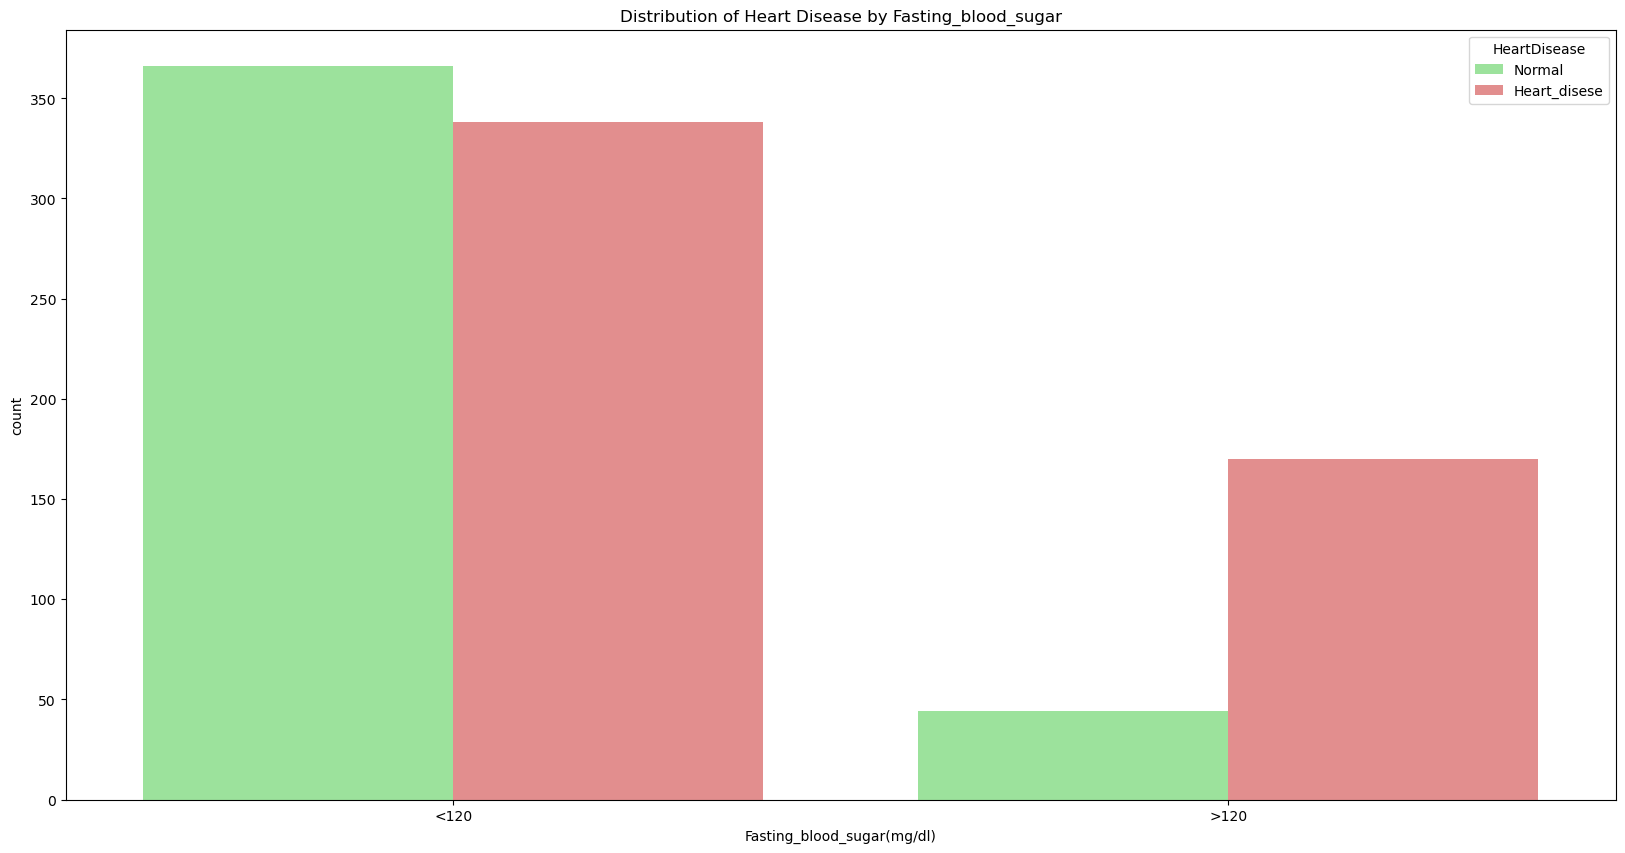

In [119]:
plt.figure(figsize=(20,10))
sns.countplot(x=df["Fasting_blood_sugar(mg/dl)"],hue=df["HeartDisease"],palette=['lightgreen', 'lightcoral'])
plt.title("Distribution of Heart Disease by Fasting_blood_sugar")
plt.show()

# Distribution of Heart Disease by MaxHR

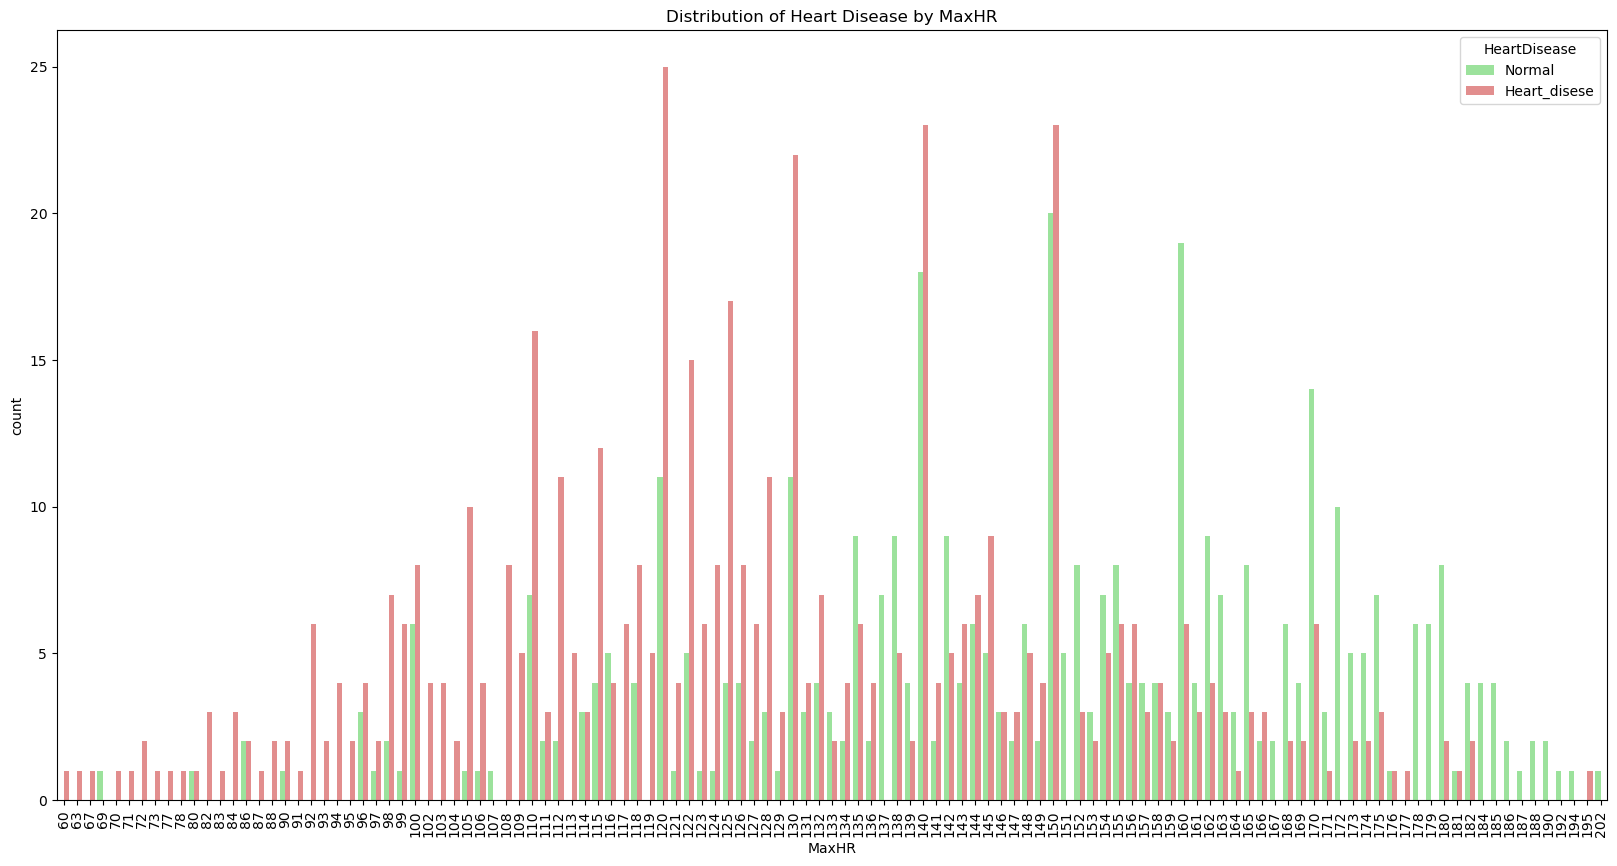

In [121]:
plt.figure(figsize=(20,10))
sns.countplot(x=df["MaxHR"],hue=df["HeartDisease"],palette=['lightgreen', 'lightcoral'])
plt.title("Distribution of Heart Disease by MaxHR")
plt.xticks(rotation=90)
plt.show()

# Distribution of Heart Disease by ExerciseAngina

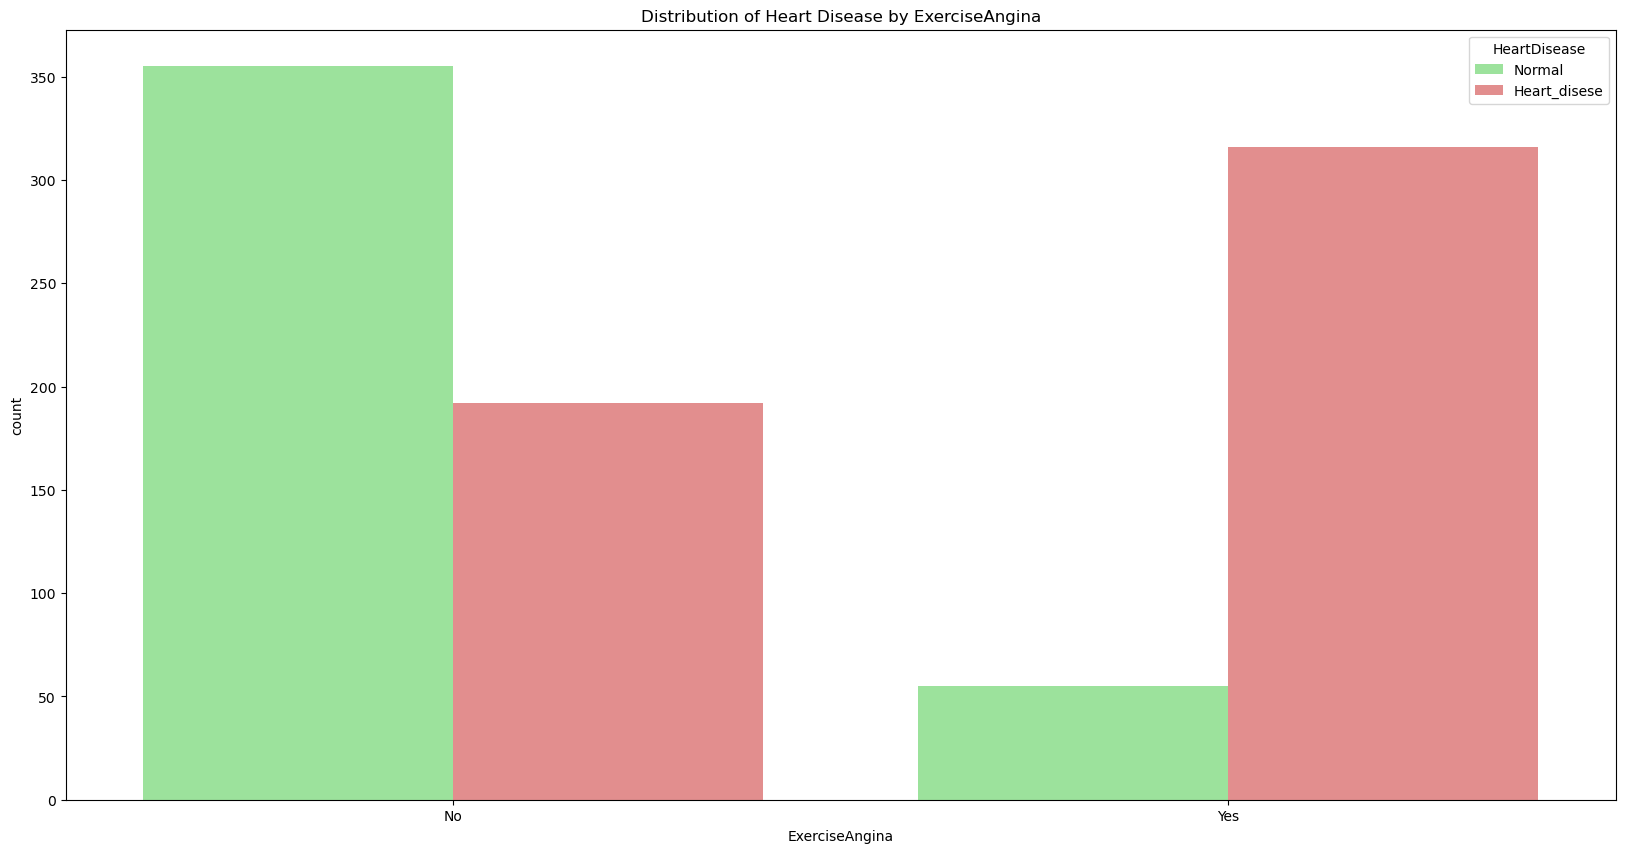

In [122]:
plt.figure(figsize=(20,10))
sns.countplot(x=df["ExerciseAngina"],hue=df["HeartDisease"],palette=['lightgreen', 'lightcoral'])
plt.title("Distribution of Heart Disease by ExerciseAngina")
plt.show()

# Distribution of Heart Disease by Oldpeak

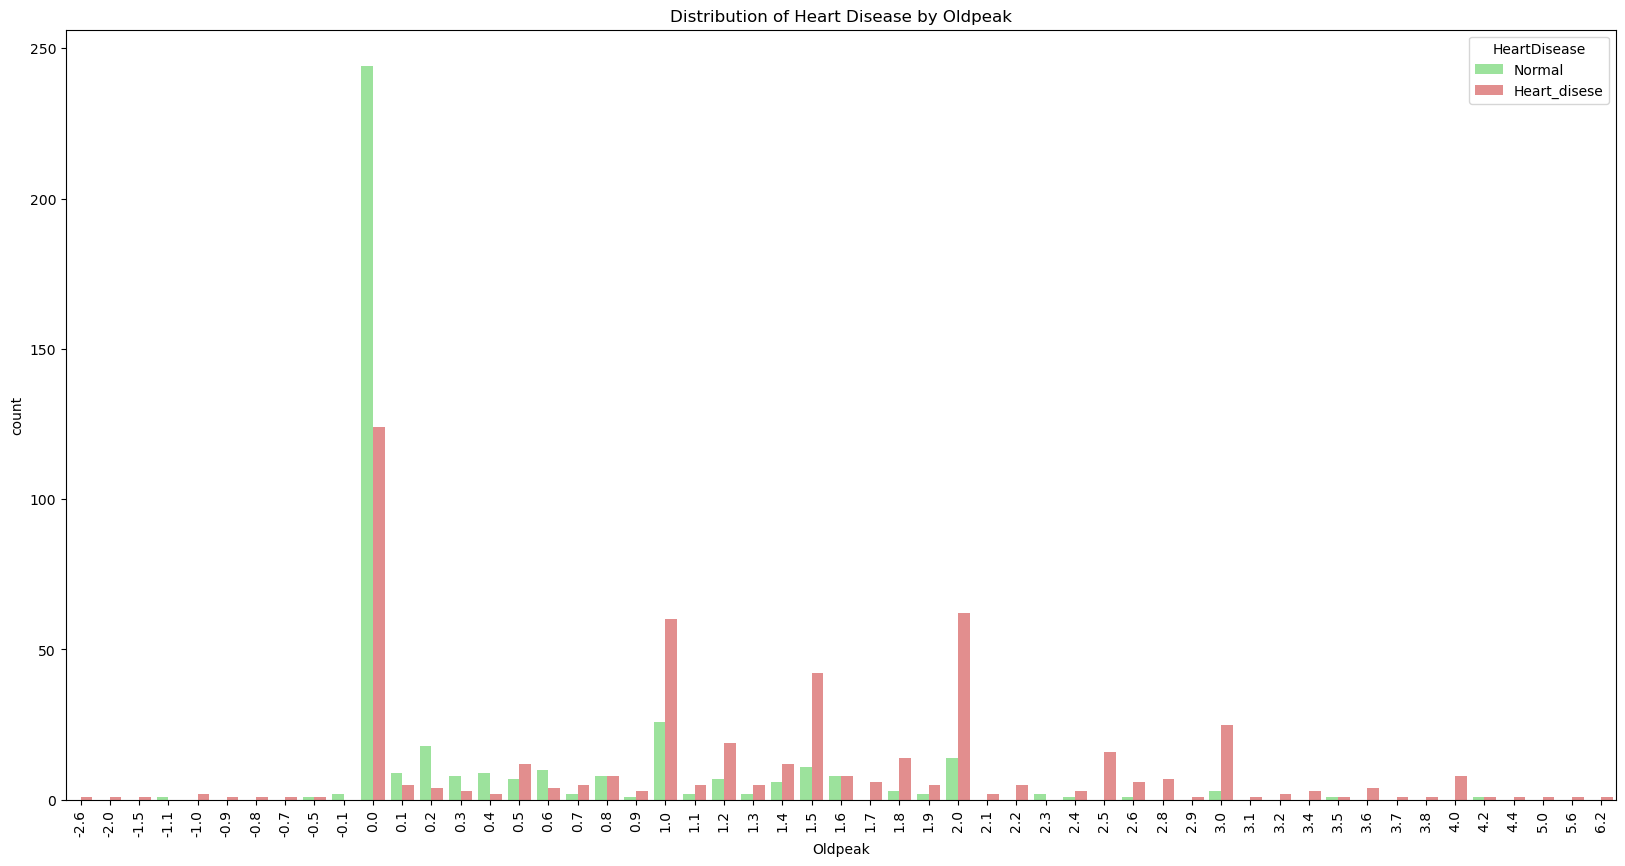

In [123]:
plt.figure(figsize=(20,10))
sns.countplot(x=df["Oldpeak"],hue=df["HeartDisease"],palette=['lightgreen', 'lightcoral'])
plt.title("Distribution of Heart Disease by Oldpeak")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Distribution of Heart Disease by ST_Slope

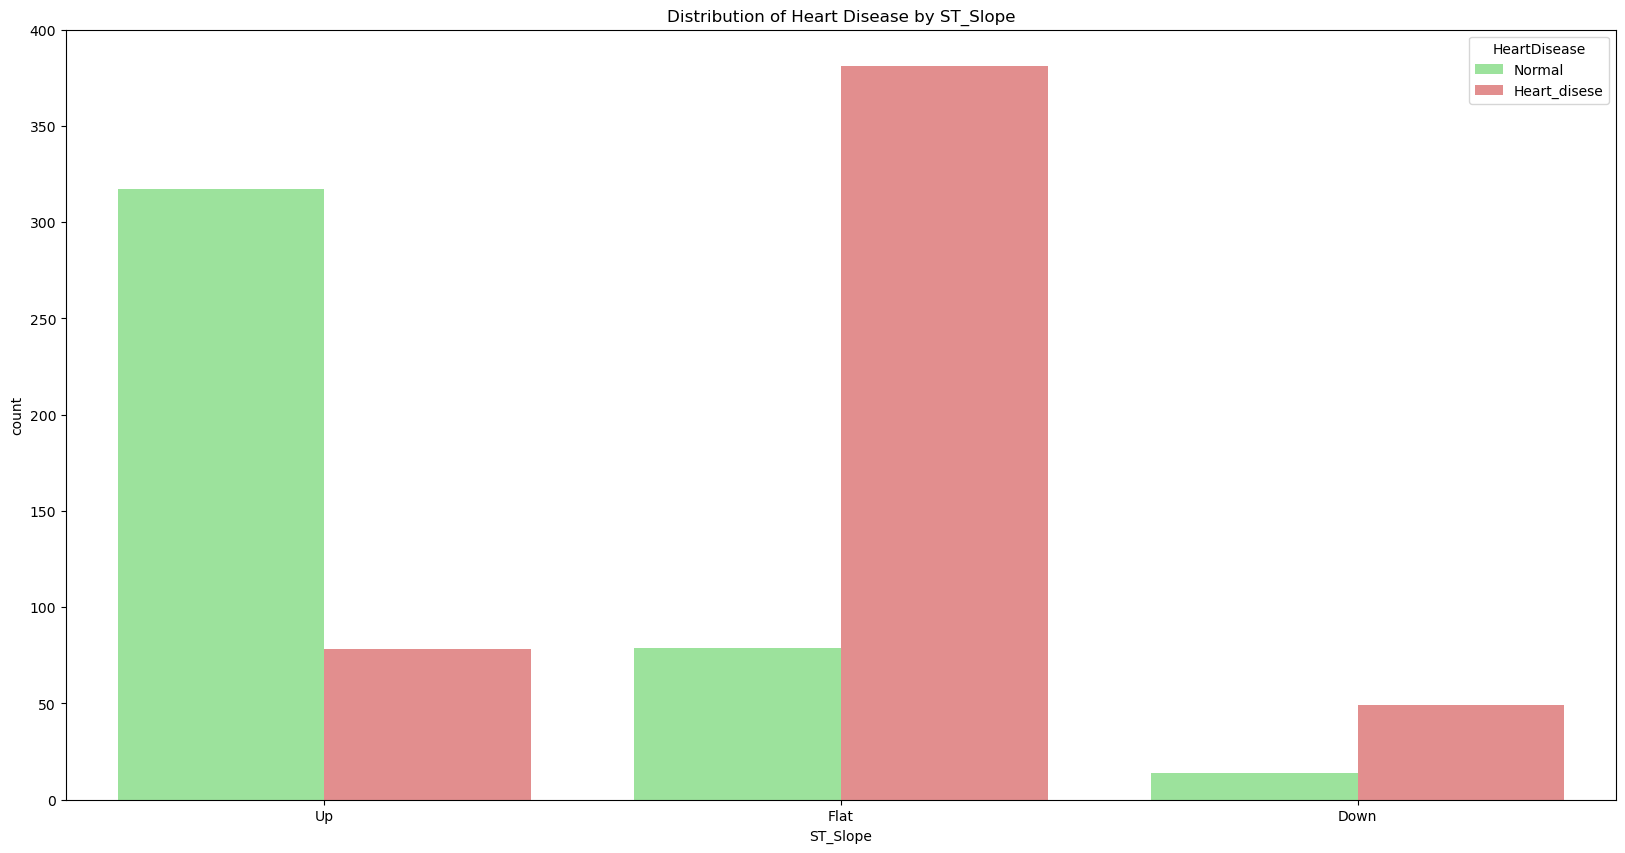

In [124]:
plt.figure(figsize=(20,10))
sns.countplot(x=df["ST_Slope"],hue=df["HeartDisease"],palette=['lightgreen', 'lightcoral'])
plt.title("Distribution of Heart Disease by ST_Slope")
plt.show()

# Correlation Analysis

# Pairplot

[]

<Figure size 2500x1500 with 0 Axes>

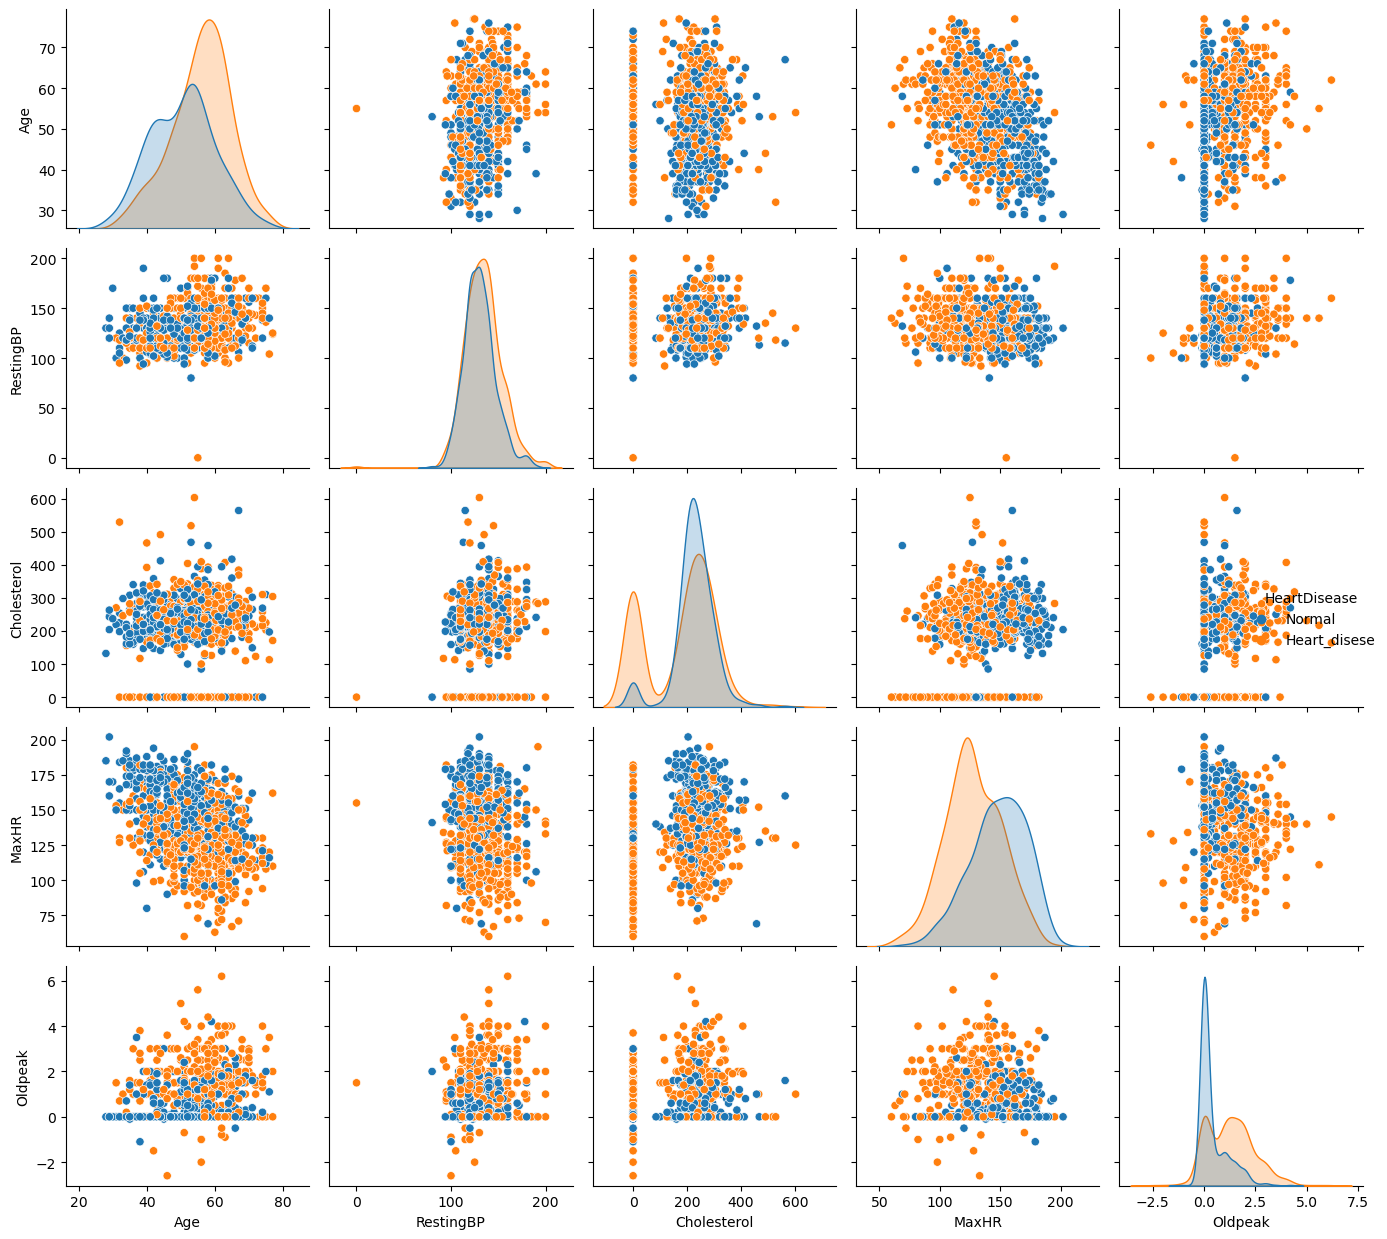

In [128]:
plt.figure(figsize=(25,15))
sns.pairplot(df,hue='HeartDisease')
plt.tight_layout()
plt.plot()